# Introduction

In this notebook we use Google's Tensorflow library to predict the price of the diamonds from the carat.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from scipy import stats

## The data

### Getting the data

Reading the dataset into a Pandas Dataframe Object

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Removing unnecessary columns

We will use the carat(x) to predict the price(y), so we can ignore the other features:

In [4]:
data = data[['carat', 'price']]

In [5]:
data.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


### Cleaning the data
The dataset has no null values as seen:

In [6]:
data.isna().sum()

carat    0
price    0
dtype: int64

Remove outliers that have z score higher than 3 or lower than -3 

In [7]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


## Linear regression

### Correlation Coefficient

we Begin by getting the correlation coefficient (r) between the carat and the price:



In [8]:
r = data['carat'].corr(data['price'])
r

0.9201140423113281

In [9]:
y_mean = data['price'].mean()
y_mean

3591.0762465017992

In [10]:
x_mean = data['carat'].mean()
x_mean

0.7634645039693874

## y_hat = b0 * x + b1

In [11]:
b0 = r * (data['price'].std() / data['carat'].std())
b0

7410.769564448648

In [12]:
b1 = y_mean - (b0 * x_mean)
b1

-2066.783263051421

now predict new price values:

In [13]:
y_hat = b0 * data['carat'][20] + b1
y_hat

156.44760628317363

In [14]:
data['price'][20]

351

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [15]:
carats = tf.linspace(0.0, 2.5, 52527)
prices = (b0 * carats) + b1


In [16]:
def plot_carat(x, y):
    plt.figure(figsize=(15, 10))
    plt.scatter(data['carat'], data['price'], label='Data', color='#6b1693')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('carat')
    plt.ylabel('price')
    plt.legend()


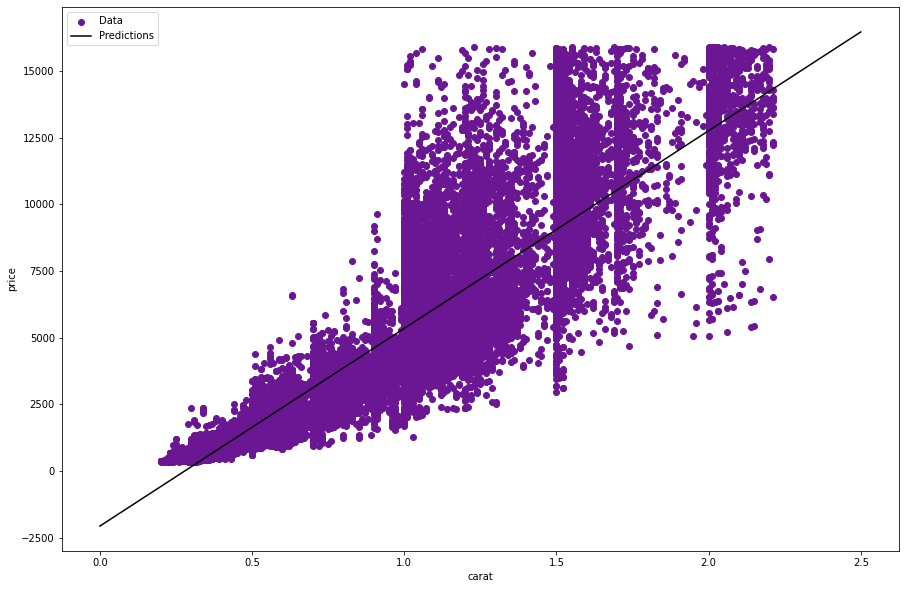

In [17]:
plot_carat(carats, prices)

mean absolute error is 885.47

In [18]:
prices = (b0 * data['carat']) + b1
error = prices - data['price']
error = np.abs(error)
error.mean()

885.4745102307874

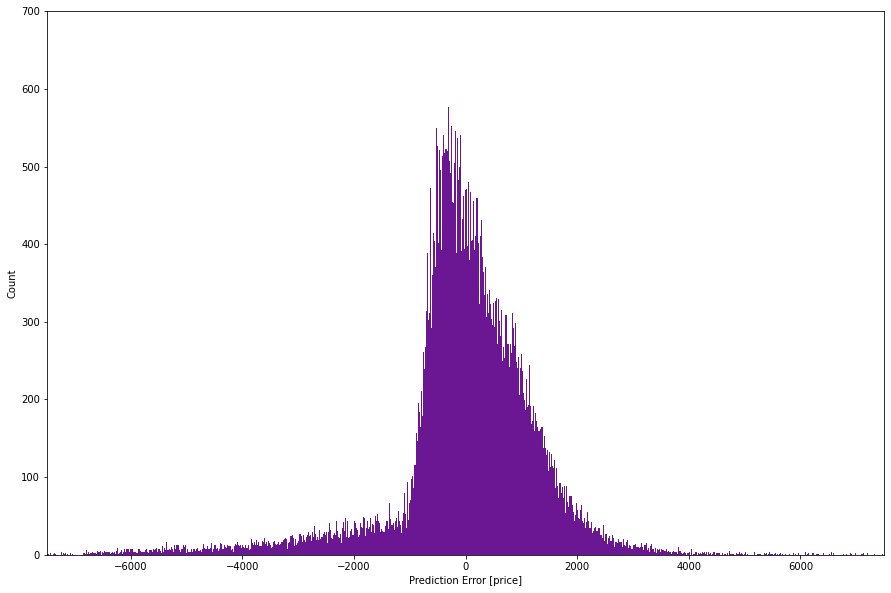

In [19]:
error = prices - data['price']
plt.figure(figsize=(15, 10))
plt.hist(error, bins=1000, color='#6b1693')
plt.xlabel('Prediction Error [price]')
xlim = [-7500, 7500]
ylim = [0, 700]
plt.xlim(xlim)
plt.ylim(ylim)
_ = plt.ylabel('Count')


## Conclusion

We used correlation coefficient to perform linear regression to the diamond price using the diamond carat. We then measured the regression performance by calculating the mean absolute error which turned out to be `885.47`